## Import library pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Baca data CSV

In [2]:
df_students_performance = pd.read_csv("StudentsPerformance.csv")

# Lihat data CSV

In [3]:
df_students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df_students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Jenis / Tipe Data Variabel Dataset
- gender (Kategorikal)
- race/ethnicity (Kategorikal)
- parental level of education (Kategorikal)
- lunch (Kategorikal)
- test preparation course (Kategorikal)
- math_score (Numerikal Diskrit)
- reading_score (Numerikal Diskrit)
- writing_score (Numerikal Diskrit)

# A. Buat Tabel Distribusi Frekuensi dan Histogram Variabe reading_score dan writing_score dengan jumlah dan lebar interval sebesar 10.

## Tabel Distribusi Frekensi

### reading_score

In [5]:
def tabel_distribusi_frekuensi(data_terurut, lebar_kelas=10):
    nilai_terkecil = data_terurut[0]
    nilai_terbesar = data_terurut[len(data_terurut)-1]
    bins = []
    
    i = nilai_terkecil.copy() - 1
    while True:
        if i < nilai_terbesar:
            bins.append(i)
        else:
            bins.append(i)
            break
        i += 10
    
    data_bins = pd.cut(data_terurut, bins=bins)

    distribusi_frekuensi = pd.DataFrame(data_bins.value_counts().sort_index().rename("frekuensi")).reset_index()
    return distribusi_frekuensi.rename(columns={"index": "interval"})

def plot_histogram(tabel_distribusi, title):
    plt.figure(figsize=(28,9))
    ax = tabel_distribusi.plot(kind='bar', align='center', width=1.0, legend=None)
    ax.set_xticks(np.arange(len(tabel_distribusi)))
    ax.set_xticklabels(tabel_distribusi['interval'], rotation=0)
    ax.set_xlabel("Interval")
    ax.set_ylabel("Frekuensi")
    ax.set_title(title)
    plt.show()

In [6]:
data_read_scr = df_students_performance.reading_score.sort_values().reset_index(drop=True)
rse_dist_table = tabel_distribusi_frekuensi(data_read_scr)

rse_dist_table

,interval,frekuensi
0,"(16, 26]",5
1,"(26, 36]",10
2,"(36, 46]",51
3,"(46, 56]",126
4,"(56, 66]",227
5,"(66, 76]",262
6,"(76, 86]",206
7,"(86, 96]",88
8,"(96, 106]",25


<Figure size 2016x648 with 0 Axes>

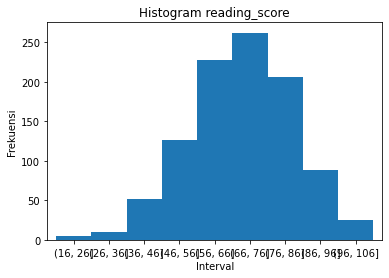

In [7]:
plot_histogram(rse_dist_table, "Histogram reading_score")

In [8]:
data_write_scr = df_students_performance.writing_score.sort_values().reset_index(drop=True)
wsr_dist_table = tabel_distribusi_frekuensi(data_write_scr)

wsr_dist_table

,interval,frekuensi
0,"(9, 19]",3
1,"(19, 29]",6
2,"(29, 39]",23
3,"(39, 49]",82
4,"(49, 59]",167
5,"(59, 69]",230
6,"(69, 79]",254
7,"(79, 89]",157
8,"(89, 99]",64
9,"(99, 109]",14


<Figure size 2016x648 with 0 Axes>

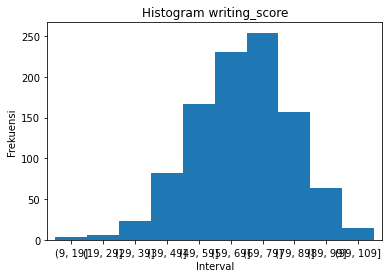

In [9]:
plot_histogram(wsr_dist_table, "Histogram writing_score")

### writing_score

In [10]:
df_students_performance['writing_score'].value_counts()

74    35
70    33
68    31
73    28
80    27
      ..
28     1
35     1
19     1
22     1
23     1
Name: writing_score, Length: 77, dtype: int64

## Histrogram

### reading_score

<AxesSubplot:>

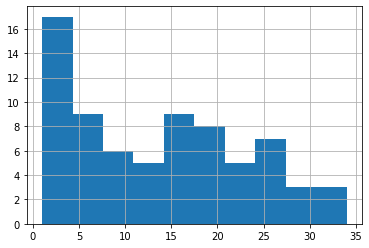

In [11]:
df_students_performance['reading_score'].value_counts().hist()

### writing_score

<AxesSubplot:>

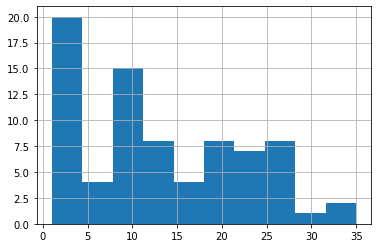

In [12]:
df_students_performance['writing_score'].value_counts().hist()

# B. Tentukan nilai Tendensi Central: Rata-rata, Median, Modus, Min dan Max data kedua variable tersebut

## Rata-rata

### reading_score

In [13]:
df_students_performance['reading_score'].mean()

69.169

### writing_score

In [14]:
df_students_performance['writing_score'].mean()

68.054

## Median

### reading_score

In [15]:
df_students_performance['reading_score'].median()

70.0

### writing_score

In [16]:
df_students_performance['writing_score'].median()

69.0

## Modus

### reading_score

In [17]:
df_students_performance['reading_score'].mode()

0    72
dtype: int64

### writing_score

In [18]:
df_students_performance['writing_score'].mode()

0    74
dtype: int64

## Min

### reading_score

In [19]:
df_students_performance['reading_score'].min()

17

### writing_score

In [20]:
df_students_performance['writing_score'].min()

10

## Max

### reading_score

In [21]:
df_students_performance['reading_score'].max()

100

### writing_score

In [22]:
df_students_performance['writing_score'].max()

100

# C. Tentukan nilai Variasi: Jangkauan Range, Kisaran Interkuartil, Varians, Standar Deviasi data reading_score dan writing_score

## Jangkauan Range

### reading_score

In [23]:
df_students_performance['reading_score'].max() - df_students_performance['reading_score'].min()

83

### writing_score

In [24]:
df_students_performance['writing_score'].max() - df_students_performance['writing_score'].min()

90

## Interkuartil

### reading_score

#### Q1

In [25]:
df_students_performance['reading_score'].quantile(0.25)

59.0

#### Q2

In [26]:
df_students_performance['reading_score'].quantile(0.50)

70.0

#### Q3

In [27]:
df_students_performance['reading_score'].quantile(0.75)

79.0

### writing_score

#### Q1

In [28]:
df_students_performance['writing_score'].quantile(0.25)

57.75

#### Q2

In [29]:
df_students_performance['writing_score'].quantile(0.50)

69.0

#### Q3

In [30]:
df_students_performance['writing_score'].quantile(0.75)

79.0

## Varians

### reading_score

In [31]:
df_students_performance['reading_score'].var()

213.1656046046047

### writing_score

In [32]:
df_students_performance['writing_score'].var()

230.90799199199168

## Standar Deviasi

### reading_score

In [33]:
df_students_performance['reading_score'].std()

14.60019193725222

### writing_score

In [34]:
df_students_performance['writing_score'].std()

15.195657010869642

# D. Buat Grafik data Variabel reading_score dan writing_score: Histogram, BOX PLOT, dan Tentukan Nilai Skewness dan Kurtosis. Buat interpretasi saudara tentang perbedaan distribusi kedua variable tersebut, terutama pada gambar BOX PLOT dan nilai Skewness - Kurtosisnya.

## Histogram

<AxesSubplot:>

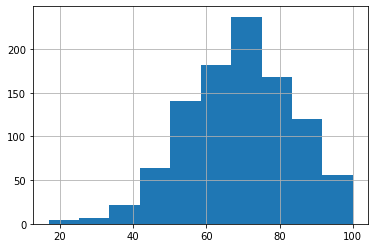

In [35]:
df_students_performance['reading_score'].sort_values().reset_index(drop=True).hist()

<AxesSubplot:>

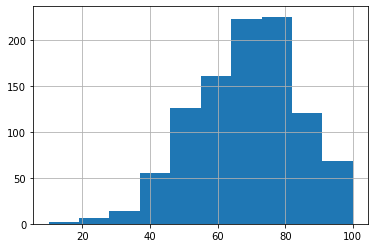

In [36]:
df_students_performance['writing_score'].sort_values().reset_index(drop=True).hist()

## Box Plot

<AxesSubplot:>

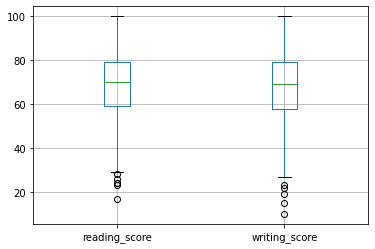

In [37]:
df_students_performance.boxplot(column = ['reading_score', 'writing_score'])

## Skewness

### reading_score

In [38]:
df_students_performance['reading_score'].skew()

-0.25910451810923063

### writing_score

In [39]:
df_students_performance['writing_score'].skew()

-0.28944397150761897

## Kurtosis

### reading_score

In [40]:
df_students_performance['reading_score'].kurtosis()

-0.0682654585647704

### writing_score

In [41]:
df_students_performance['writing_score'].kurtosis()

-0.03336461500693577

# E. Buat scater plot antara writing_score (dependent variable-Y) versus reading_score (independent variable-X). Tulis interpretasi saudara apakah ada indikasi hubungan liear antar keduanya.

## Scater Plot

<AxesSubplot:xlabel='reading_score', ylabel='writing_score'>

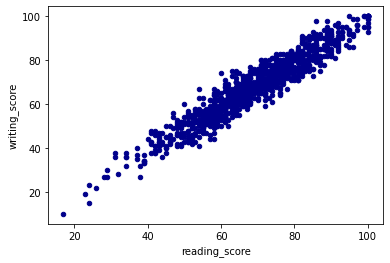

In [42]:
df_students_performance.plot.scatter(x='reading_score',
                                     y='writing_score',
                                     c='DarkBlue'
                                    )